# Part 1

In [1]:
def slow_matrix_product(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = []
    for c in range(mat2.shape[1]):
        column = []
        for r in range(mat1.shape[0]):
            value = 0
            for i in range(mat1.shape[1]):
                value += mat1[r, i] * mat2[i, c]
            column.append(value)
        result.append(column)
    return np.array(result).transpose()

## Write your own function called faster_matrix_product that computes the product of two matrices more efficiently than slow_matrix_product.

In [ ]:
def fast_matrix_product(mat1, mat2):
    assert mat1.shape[1] == mat2.shape[0]
    result = []
    for c in range(mat2.shape[1]):
        column = []
        for r in range(mat1.shape[0]):
            value = mat1[r, :].dot(mat2[:, c])
            column.append(value)
        result.append(column)
    return np.array(result).transpose()

## Write a Python script using an assert statement that checks that your function gives the same result as using @ for random 2 by 2, 3 by 3, 4 by 4, and 5 by 5 matrices.

In [ ]:
import numpy as np

for size in range(1, 6):
    matrix1 = np.random.rand(size, size)
    matrix2 = np.random.rand(size, size)

    print(matrix1 @ matrix2)
    print(fast_matrix_product(matrix1, matrix2))

    assert np.allclose(fast_matrix_product(matrix1, matrix2), matrix1 @ matrix2)

[[0.09076682]]
[[0.09076682]]
[[0.39382465 0.324215  ]
 [0.72215536 0.77372441]]
[[0.39382465 0.324215  ]
 [0.72215536 0.77372441]]
[[0.3724061  0.613219   0.66713391]
 [0.76643914 1.26204033 1.40355113]
 [0.22255576 0.39220281 0.46358065]]
[[0.3724061  0.613219   0.66713391]
 [0.76643914 1.26204033 1.40355113]
 [0.22255576 0.39220281 0.46358065]]
[[1.85181728 1.71652511 0.97592627 2.270007  ]
 [0.82392748 0.90854337 0.49634061 1.31497439]
 [1.95919916 1.81150543 1.04689381 2.57004452]
 [0.79221593 1.07532946 0.46831185 1.31720762]]
[[1.85181728 1.71652511 0.97592627 2.270007  ]
 [0.82392748 0.90854337 0.49634061 1.31497439]
 [1.95919916 1.81150543 1.04689381 2.57004452]
 [0.79221593 1.07532946 0.46831185 1.31720762]]
[[1.03911649 1.27795752 1.68595434 1.24682158 1.60528337]
 [1.11229231 1.17178979 1.53900902 0.74784972 1.30160475]
 [1.2644587  1.30784145 1.43630944 0.95586621 1.18441575]
 [1.8743961  1.67452814 2.11867203 0.94678237 1.63997233]
 [1.66944916 1.4909904  1.83212218 0.828

## give two brief reasons (1-2 sentences for each) why your function is better than slow_matrix_product. At least one of your reasons should be related to the time you expect the two functions to take.

1. Reduce 1 for loops therefore reduce computation time.
2. Replace python list with a simple numpy array, reduce required memory.

## Write a Python script that runs the two functions for matrices of a range of sizes, and use matplotlib to create a plot showing the time taken for different sized matrices for both functions.

[ 30. 138. 245. 353. 461. 568. 676. 784. 891. 999.]


100%|██████████| 10/10 [20:47<00:00, 124.77s/it]

[0.012120542999809913, 1.2231752490001782, 7.328869050000094, 18.731845217, 40.55046104799999, 82.85483159599994, 134.83244474799994, 212.17879007700003, 307.0219429120002, 435.5876721489999]
[0.0022640099998625374, 0.02452984300020944, 0.08836025199980213, 0.20991071000003103, 0.37118148800004747, 0.5540904150000188, 0.840985031999935, 1.2044155349999528, 1.6803401940001095, 2.3065617700003713]


Text(0, 0.5, 'time /s')

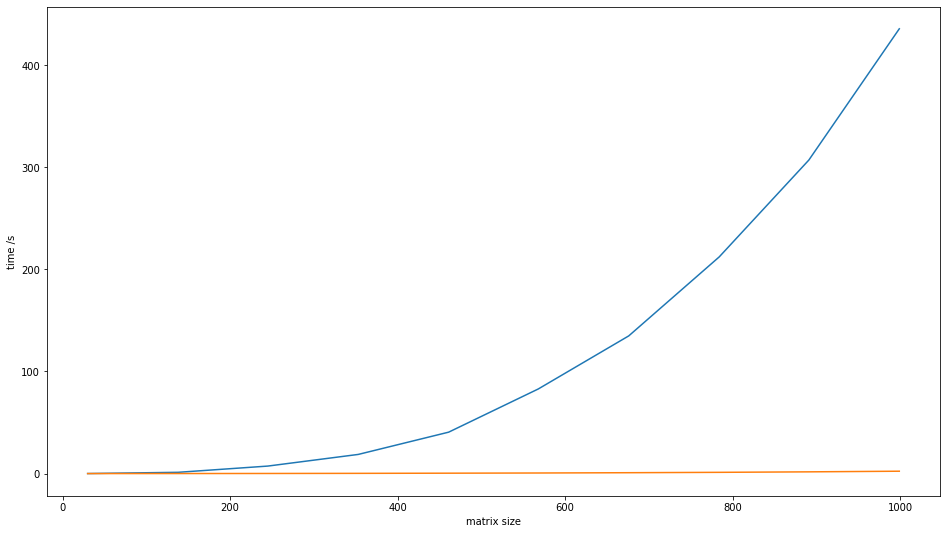

In [ ]:
import timeit
import numpy as np
from tqdm import tqdm

size = 1000
number = 1
x = np.round(np.linspace(30, size - 1, 10))
print(x)
slow_time = []
fast_time = []

for i in tqdm(x):
    mat1 = np.random.rand(int(i), int(i))
    mat2 = np.random.rand(int(i), int(i))
    t1 = timeit.Timer(lambda: fast_matrix_product(mat1, mat2)).timeit(number)
    t2 = timeit.Timer(lambda: slow_matrix_product(mat1, mat2)).timeit(number)
    fast_time.append(t1 / number)
    slow_time.append(t2 / number)

print(slow_time)
print(fast_time)

import matplotlib.pylab as plt

plt.figure(figsize=(16, 9))
plt.plot(x, slow_time)
plt.plot(x, fast_time)

plt.xlabel("matrix size")
plt.ylabel("time /s")

# Part 2

## Create a copy of your function faster_matrix_product that is just-in-time (JIT) compiled using Numba.

In [ ]:
from numba import jit


@jit(nopython=True)
def fast_matrix_product_numba(mat1, mat2):
    assert mat1.shape[1] == mat2.shape[0]
    result = []
    for c in range(mat2.shape[1]):
        column = []
        for r in range(mat1.shape[0]):
            value = mat1[r, :].dot(mat2[:, c])
            column.append(value)
        result.append(column)
    return np.array(result)

# matrix1 = np.random.rand(4,4)
# matrix2 = np.random.rand(4,4)
# result=fast_matrix_product_numba(matrix1, matrix2)
# print(result)

[100. 164. 228. 293. 357. 421. 485. 550. 614. 678. 742. 806. 871. 935.
 999.]


100%|██████████| 15/15 [00:20<00:00,  1.40s/it]


[0.003660365999849091, 0.01318975499998487, 0.0213007690001632, 0.04258669099999679, 0.07916034499999114, 0.12353601699987848, 0.27464600100006464, 0.29379450699980225, 0.4005083020001621, 0.527464658000099, 0.6803536219999842, 0.8621983349999027, 1.1086608589998832, 1.358345725000163, 1.6980746220001492]
[0.017639285999848653, 0.06656315999998696, 0.1289401579999776, 0.18197383899996566, 0.2513989069998388, 0.35289139099995737, 0.48170958100013195, 0.9764781190001486, 0.7937092399999983, 0.9871982610000032, 1.1315610899998774, 1.3869376599998304, 1.7249372859998857, 2.045592643999953, 2.411380266999913]


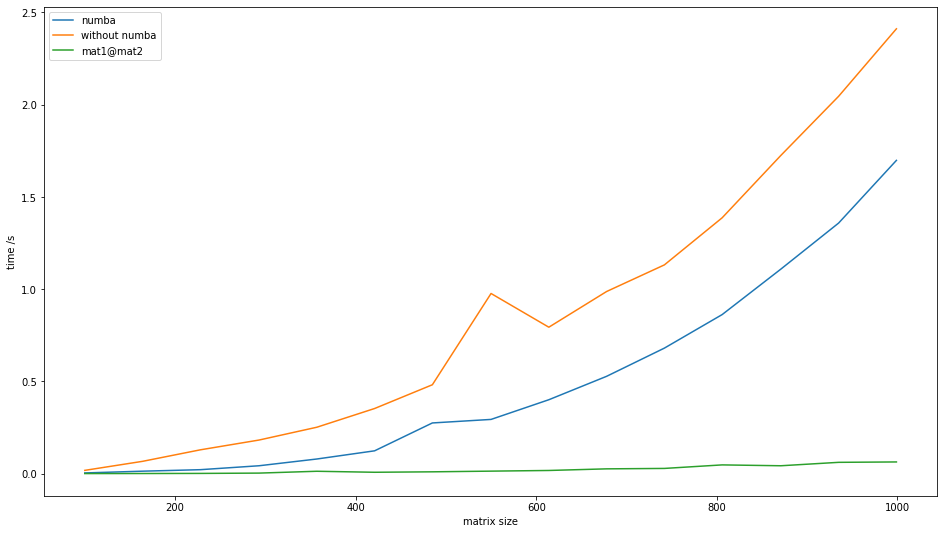

In [ ]:
import timeit
import numpy as np
from tqdm import tqdm

numba_time = []
fast_time = []
numpy_time = []
size = 1000
number = 1
x = np.round(np.linspace(100, size - 1, 15))
print(x)

for i in tqdm(x):
    # print(i)
    mat1 = np.random.rand(int(i), int(i))
    mat2 = np.random.rand(int(i), int(i))

    t1 = timeit.Timer(lambda: fast_matrix_product(mat1, mat2)).timeit(number)

    t2 = timeit.Timer(lambda: fast_matrix_product_numba(mat1, mat2)).timeit(number)

    t3 = timeit.Timer(lambda: mat1 @ mat2).timeit(number)

    fast_time.append(t1 / number)

    numba_time.append(t2 / number)

    numpy_time.append(t3 / number)

print(numba_time)
print(fast_time)

import matplotlib.pylab as plt

plt.figure(figsize=(16, 9))
plt.plot(x, numba_time, label='numba')
plt.plot(x, fast_time, label='without numba')
plt.plot(x, numpy_time, label="mat1@mat2")

plt.xlabel("matrix size")
plt.ylabel("time /s")
plt.legend()
plt.show()

## Make a plot that compares the times taken by your JIT compiled function when the inputs have different combinations of C-style and Fortran-style ordering

[ 80. 146. 211. 277. 343. 408. 474. 540. 605. 671. 736. 802. 868. 933.
 999.]


100%|██████████| 15/15 [00:47<00:00,  3.15s/it]


complete calculation


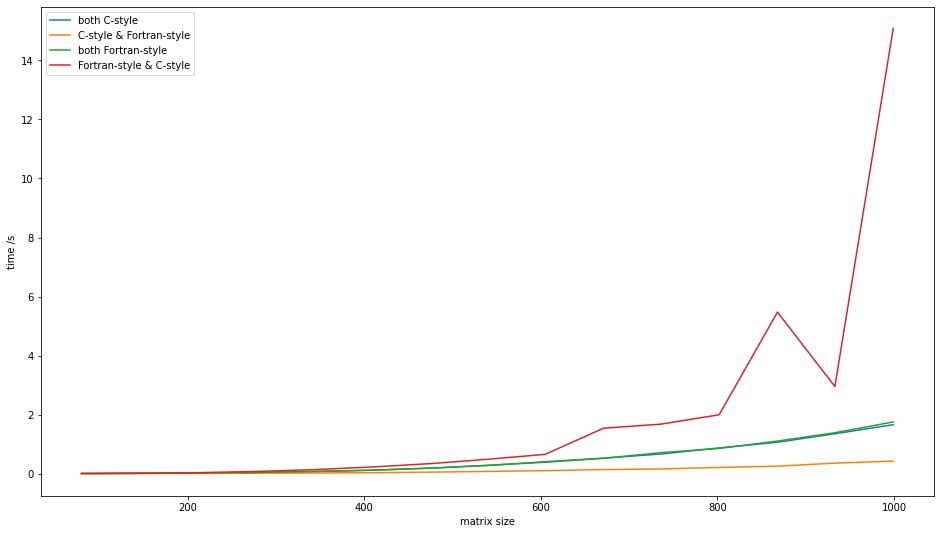

In [ ]:
import timeit
import numpy as np
from tqdm import tqdm

size = 1000
x = np.round(np.linspace(80, size - 1, 15))
print(x)
c_c_time = []
c_f_time = []
f_f_time = []
f_c_time = []

number = 1
for i in tqdm(x):
    mat1_c = np.random.rand(int(i), int(i))
    mat2_c = np.random.rand(int(i), int(i))

    mat1_f = np.asfortranarray(mat1_c)
    mat2_f = np.asfortranarray(mat2_c)

    # t1=timeit.Timer("fast_matrix_product_numba( mat1_c,mat2_c)","from __main__ import fast_matrix_product_numba,mat1_c,mat2_c").timeit(number)
    # t2=timeit.Timer("fast_matrix_product_numba( mat1_c,mat2_f)","from __main__ import fast_matrix_product_numba,mat1_c,mat2_f").timeit(number)
    # t3=timeit.Timer("fast_matrix_product_numba( mat1_f,mat2_f)","from __main__ import fast_matrix_product_numba,mat1_f,mat2_f").timeit(number)
    # t4=timeit.Timer("fast_matrix_product_numba( mat1_f,mat2_c)","from __main__ import fast_matrix_product_numba,mat1_f,mat2_c").timeit(number)

    t1 = timeit.Timer(lambda: fast_matrix_product_numba(mat1_c, mat2_c)).timeit(number)
    t2 = timeit.Timer(lambda: fast_matrix_product_numba(mat1_c, mat2_f)).timeit(number)
    t3 = timeit.Timer(lambda: fast_matrix_product_numba(mat1_f, mat2_f)).timeit(number)
    t4 = timeit.Timer(lambda: fast_matrix_product_numba(mat1_f, mat2_c)).timeit(number)

    c_c_time.append(t1 / number)
    c_f_time.append(t2 / number)
    f_f_time.append(t3 / number)
    f_c_time.append(t4 / number)

print('complete calculation')

import matplotlib.pylab as plt

plt.figure(figsize=(16, 9))
plt.plot(x, c_c_time, label="both C-style")
plt.plot(x, c_f_time, label='C-style & Fortran-style')
plt.plot(x, f_f_time, label='both Fortran-style')
plt.plot(x, f_c_time, label='Fortran-style & C-style')

plt.xlabel("matrix size")
plt.ylabel("time /s")
plt.legend()
plt.show()

 ## comment (in 1-2 sentences) on why one of these orderings appears to be fastest that the others.